# Разработка модели машинного обучения для прогнозирования рисков для здоровья беременных

## Описание работы

**Цель работы:**
Построить и обучить модель машинного обучения (МО), которая позволит предсказать уровень уровень риска для здоровья беременной.

**Планируемое использование результата работы:**
Заказчику необходимо приобрести инструмент, который поможет врачу оперативно оценить уровень риски для здоровья пациента.

**Входные данные:**
Заказчик предоставил набор данных о пациентах (беременных) с указанием характеристики здоровья и его возраста.

**Ключевые задачи работы:**
1. Изучить и подготовить данные для разработки моделей МО.
2. Определить условия работки моделей, разработать несколько моделей с использованием различных алгоритмов.
3. Оценить качество работы моделей. Выбрать лучшую модель.
4. Протестировать лучшую модель.
5. Разработать простейший интерфейс взаимодействия врача и модели.
6. Сформировать план на дальнейшую работу.

**Критерии заказчика:** Требования заказчика к метрике качества модели не установлены. Требований к скорости обучения и работы моделей не имеется.

**План работы:**

1. Изучение и подготовка данных.
    - Загрузка и изучение данных: изучить входные данные, оценить полноту и качество входных данных для достижения цели исследования; определить задачи предобработки данных;    
    - Преобработка данных: осуществить предобработку данных в части улучшения качества данных для дальнейшего анализа.
    - Исследовательский анализ данных: провести исследовательский анализ данных; оценить необходимость формирования дополнительных категорий, параметров и групп данных для достижения цели исследования, feature engineering: объединить или разделить необходимые данные, сформировать новые признаки, дополнительные категории и группы данных.
    - Корреляционный анализ данных, в том числе предварительный отбор признаков.
    - Подготовка данных: сформировать основные пайп-лайны, разделить дата-сет на выборки.
2. Разработка моделей.
    - Определение условий разработки моделей МО: определиться с критериями разработки моделей, метриками качества моделей, с используемыми алгоритмами, критериями сравнения моделей.
    - Основной этап моделирования: разработать модели, получить результаты для анализа их качества и скорости.
3. Оценка качества работы моделей: выбор лучшей модели.
4. Оценка качества работы лучшей модели на тестовой выборке.
5. Оценка важности признаков, проведение экспериментов по повышению качества модели.
6. Разработка интефейса взаимодействия клиентов и модели.

## Краткое описание результатов работы

**Основные этапы и результаты**

- **EDA:** Проведен исследовательский и корреляционный анализ данных. В данных обнаружено очень много дубликатов (более 50%). Размер датасета был значительно сокращен. Подробности представлены в [ноутбуке](eda.ipynb)
- **Метрики и условия моделирования:** Выбраны контролируемые и анализируемые метрики: **F1_Weighted** и **ROC-AUC**. Подробности представлены в [ноутбуке](baseline.ipynb) разработки baseline модели.
- **Baseline модель:** Сформирована модель с использованием алгоритма LogisticRegression. Результат кросс-валидации - **F1_Weighted = 0.690**. Подробности представлены в [ноутбуке](baseline.ipynb) разработки baseline модели.
- **Проведение экспериментов:** Проведены эксперименты по повышению качества модели, сформирована финальная модель. Результат кросс-валидации - **F1_Weighted = 0.756**. В рамках экспериментов оценена важность признаков, использованы модели, основанные на деревьях решений, в том числе техника градиентного бустинга. Подробности представлены в [ноутбуках](experiments/) экспериментов и [описании](experiments/README.md) экспериментов.
- **Классификация тестовых данных:** Оценено качество финальной модели - **F1_Weighted = 0.720**. Проведен анализ матрицы ошибок. Подробности представлены в финальном [ноутбуке](notebooks/final.ipynb).
- **Приложение на streamlit:** Разработано приложение [Maternal Health Risk App](https://maternal-health-risk.streamlit.app/)

**Анализ**

Анализ матрицы ошибок позволил определить сильные и слабые стороны модели. Были проанализированы ошибки и сделаны выводы.

<img src="..\images\test_confusion_matrix.png" alt="Confusion matrix"><img src="..\images\test_roc_auc.png" alt="ROC-AUC">

Вероятности для класса 'mid risk' зачастую очень близки к вероятностям класса 'low risk'. Это указывает, что модели недостаточно данных, чтобы увереннее выявить средний риск среди характеристик, которые указывают на низкий риск. Например, у пациента с возрастной группой 'older age' и нормальным артериальным давлением, нормальной температурой тела, модель предсказывает низкий риск, хотя фактический риск - 'mid risk'. Аналогичные случаи наблюдаются и у других пациентов.

То есть некоторые пациенты имеют характеристики, которые приводят к неоднозначным решениям модели. Например, у пациента с возрастной группой 'medium age' и нормальным артериальным давлением, уровень глюкозы и температуры тела находятся в стандартном диапазоне, что может затруднять правильное присвоение риска.

Исходя из этих наблюдений, можно сделать вывод, что модель нуждается в дополнительном обучении или рассмотрении более сложных или дополнительных признаков для более точного определения класса 'mid risk'. 

Также стоит обратить внимание на дисбаланс в данных, что влияет на качество модели.

Кроме того, необходимо не забывать, что уровень глюкозы в крови указан в странном диапазоне, поскольку нормальный уровень не превышает 6.0.
 
**Выводы**
- Качество модели зависит от размера и качества датасета:
  - В данных имеется много дубликатов, приведших к значительному сокращению данных для обучения.
  - В данных имеется дисбаланс классов, влияющий на качество предсказания класса "Средний риск".
  - Имеются сомнения в качестве разметки данных, влияющем на качество предсказания класса "Средний риск".
- Качество модели может быть улучшено за счет обогащения данных новыми наблюдениями.

**Имплементация**

* **Реализация проекта на GitHub**: Репозиторий [Maternal Health Risk App](https://github.com/alekFil/maternal_health_risk)

* **Реализация проекта на Streamlit**: Приложение [Maternal Health Risk App](https://maternal-health-risk.streamlit.app/)

## Подробное описание анализа финальной модели

In [1]:
import sys

sys.path.append("../src")

In [2]:
import joblib
import pandas as pd
from analysis import (
    plot_confusion_matrix,
    plot_prc_auc_curve,
    plot_roc_auc_curve,
)

In [3]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

### Загрузка данных

In [4]:
X_train = pd.read_csv("../data/baseline/X_train.csv")
X_test = pd.read_csv("../data/baseline/X_test.csv")
y_train = pd.read_csv("../data/baseline/y_train.csv")
y_test = pd.read_csv("../data/baseline/y_test.csv")

In [5]:
final_model = joblib.load("../models/exp3_model_756.joblib")

### Оценка качества работы лучшей модели на тестовой выборке

Оценим качество модели на тестовой выборке и выведем на экран матрицу ошибок на трейне, тесте и соответствующие графики ROC-AUC и PRC-AUC.

Выполним предсказания на трейне

In [6]:
pred_train = final_model.predict(X_train)
proba_train = final_model.predict_proba(X_train)

Отразим отчет о классификации на трейне

In [7]:
report_train = classification_report(y_train, pred_train)
print(report_train)

              precision    recall  f1-score   support

   high risk       0.88      0.93      0.90        80
    low risk       0.84      0.93      0.88       163
    mid risk       0.74      0.48      0.58        61

    accuracy                           0.84       304
   macro avg       0.82      0.78      0.79       304
weighted avg       0.83      0.84      0.83       304



В результате классификации видим, что "Высокий риск" наша модель научилась предсказывать еще лучше, также как и "Низкий риск". В то же время, "Средний риск" модель предсказывает лучше, но далеко от идеала.

Отобразим матрицу ошибок на трейне

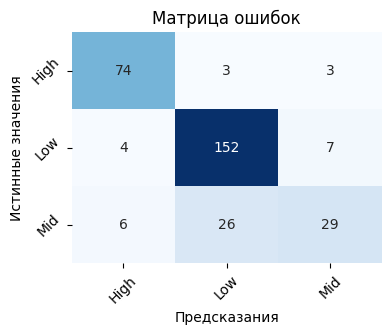

In [8]:
cnf_matrix_train = confusion_matrix(y_train, pred_train)
plot_confusion_matrix(cnf_matrix_train, ["High", "Low", "Mid"])

Из этой матрицы ошибок мы видим, что модель научилась предсказывать "Средний риск" не принимая за него экземпляры "Низкого риска" и "Высокого риска". Однако, очень часто модель предсказывает "Низкий риск" для реальных экземпляров "Среднего риска".

Оценим значение ROC-AUC

In [9]:
roc_auc_train = roc_auc_score(
    y_train["risk_level"], proba_train, multi_class="ovo", average="weighted"
)
roc_auc_train

0.9369565228628842

Значение ROC-AUC не очень высоко. Модель не очень хорошо различает классы. Отобразим кривые ROC-AUC на графике.

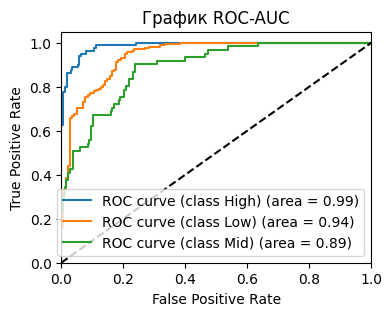

In [10]:
plot_roc_auc_curve(y_train["risk_level"], proba_train, ["High", "Low", "Mid"])

Аналогично прослеживается ситуация, что класс "Средний риск" значительно хуже различается нашей моделью. Та же самая ситуация будет представлена на графике PRC-AUC.

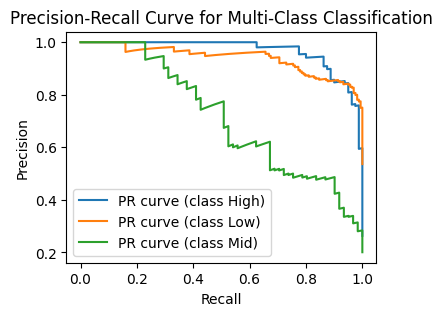

In [11]:
plot_prc_auc_curve(y_train["risk_level"], proba_train, ["High", "Low", "Mid"])

Выполним анализ для тестовой выборки

In [12]:
pred_test = final_model.predict(X_test)
proba_test = final_model.predict_proba(X_test)
report_test = classification_report(y_test, pred_test)
print(report_test)

              precision    recall  f1-score   support

   high risk       0.78      0.67      0.72        21
    low risk       0.78      0.95      0.86        41
    mid risk       0.44      0.27      0.33        15

    accuracy                           0.74        77
   macro avg       0.67      0.63      0.64        77
weighted avg       0.71      0.74      0.72        77



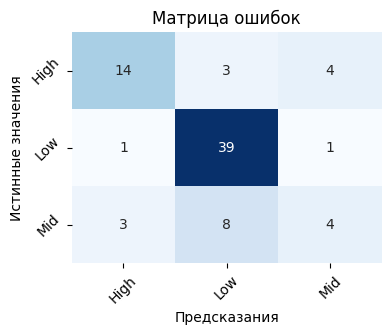

In [13]:
cnf_matrix_test = confusion_matrix(y_test, pred_test)
plot_confusion_matrix(cnf_matrix_test, ["High", "Low", "Mid"])

In [14]:
roc_auc_test = roc_auc_score(
    y_test["risk_level"], proba_test, multi_class="ovo", average="weighted"
)
roc_auc_test

0.8869436022746128

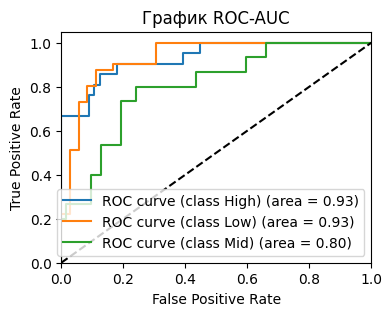

In [15]:
plot_roc_auc_curve(y_test, proba_test, ["High", "Low", "Mid"])

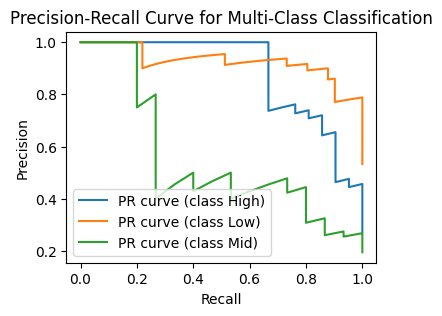

In [16]:
plot_prc_auc_curve(y_test, proba_test, ["High", "Low", "Mid"])

### Изучение ошибок модели

Изучим записи, на которых модель ошиблась. Объединим исходные данные и результаты работы модели.

In [17]:
test = pd.concat(
    [
        X_test,
        y_test,
        pd.DataFrame(pred_test, columns=["predicted_risk_level"]),
        pd.DataFrame(
            proba_test, columns=["prob_high_class", "prob_low_class", "prob_mid_class"]
        ),
    ],
    axis=1,
)
test.sample()

,age_group,pressure_group,age,systolic_bp,diastolic_bp,glucose_level,body_temperature,heart_rate,risk_level,predicted_risk_level,prob_high_class,prob_low_class,prob_mid_class
40,medium age,normal,23,130,70,7.01,98.0,78,mid risk,mid risk,0.103545,0.254128,0.642327


Отобразим ошибки предсказания класса "Среднего риска"

In [18]:
test[
    (test["risk_level"] != test["predicted_risk_level"])
    & (test["risk_level"] == "mid risk")
    & (test["predicted_risk_level"] == "low risk")
]

,age_group,pressure_group,age,systolic_bp,diastolic_bp,glucose_level,body_temperature,heart_rate,risk_level,predicted_risk_level,prob_high_class,prob_low_class,prob_mid_class
7,older age,normal,55,120,90,6.8,98.0,66,mid risk,low risk,0.069725,0.599016,0.331259
12,younger age,hypotension,10,100,50,6.0,99.0,70,mid risk,low risk,0.070886,0.523283,0.405832
13,medium age,hypotension,30,90,65,8.0,98.0,77,mid risk,low risk,0.324257,0.491798,0.183945
23,medium age,normal,32,120,80,6.8,98.0,70,mid risk,low risk,0.051763,0.562191,0.386046
25,medium age,normal,23,120,75,8.0,98.0,70,mid risk,low risk,0.179806,0.485640,0.334554
27,younger age,normal,19,120,85,7.8,98.0,60,mid risk,low risk,0.111823,0.513744,0.374433
31,medium age,normal,35,120,80,6.9,98.0,78,mid risk,low risk,0.051273,0.570758,0.377969
65,older age,hypotension,60,90,65,6.8,98.0,77,mid risk,low risk,0.053887,0.776787,0.169326


Вероятности для класса 'mid risk' зачастую очень близки к вероятностям класса 'low risk'. Это указывает, что модели недостаточно данных, чтобы увереннее выявить средний риск среди характеристик, которые указывают на низкий риск. Например, у пациента с возрастной группой 'older age' и нормальным артериальным давлением, нормальной температурой тела, модель предсказывает низкий риск, хотя фактический риск - 'mid risk'. Аналогичные случаи наблюдаются и у других пациентов.

То есть некоторые пациенты имеют характеристики, которые приводят к неоднозначным решениям модели. Например, у пациента с возрастной группой 'medium age' и нормальным артериальным давлением, уровень глюкозы и температуры тела находятся в стандартном диапазоне, что может затруднять правильное присвоение риска.

Исходя из этих наблюдений, можно сделать вывод, что модель нуждается в дополнительном обучении или рассмотрении более сложных или дополнительных признаков для более точного определения класса 'mid risk'. 

Также стоит обратить внимание на возможные дисбалансы в данных или несбалансированность классов, что может влиять на производительность модели.

Кроме того, необходимо не забывать, что уровень глюкозы в крови указан в странном диапазоне, поскольку нормальный уровень не превышает 6.0.